# Data Science Professional Certificate IBM

### Exploratory Data Analysis with Python
Análise exploratória de dados com Python

<center><img src='images/imagem1.jpg' width="auto" height="400"></center>

**Estaremos realizando uma EDA (*Exploratory Data Analysis*) em qual dataset?**

Encontrei na plataforma Kagle um dataset sobre carros contedo ANO, MODELO, MOTOR, e outras propriedades . Este dataset contém informações úteis para o MSRP (*Manufacturer Suggested Retail Price*) - Preço Sugerido pelo Fabricante, ou melhor, o Preço de Tabela.

## 1. Importando as bibliotecas necessárias para a análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns              #visualização
import matplotlib.pyplot as plt    #visualização
%matplotlib inline
sns.set(color_codes=True)

## 2. Carregando os dados para o Dataframe

In [2]:
df = pd.read_csv("data/data1.csv")
# Vamos exibir as 5 primeiras linhas
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.tail(5) #Exibe as 5 últimas linhas

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Conferindo os tipos de dados

Aqui nós conferimos os tipos de dados poque às vezes o MSRP ou preço do carro poderá está armazenado como uma string. Se for o caso, teremos que converter essa **string** para um dado do tipo **int** para podermos exibi-lo em um gráfico. Aqui no nosso dataset, os dados estão no formato de números inteiros e então não há nada para se preocupar.

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Removendo colunas irrelevantes

Este passo é certamente necessário numa análise exploratória de dados por causa que às vezes há muitas colunas que nunca usamos e para nós são desnecessárias e, nessa situação, removê-las é a solução. Nesta tabela, as colunas Engine Fuel Type (Tipo do motor), Market Category (Categoria de Mercado), Vehicle Style (Estilo do Veículo), Popularity (Popularidade), Number of Doors (Número de Portas), Vehicle Size (Tamanho do Veículo) não fazem sentido para mim, então eu apenas as removi desta instância.

In [5]:
df = df.drop(['Engine Fuel Type','Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1 )
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Renomeando as colunas

Nesse momento, a maioria dos nomes das colunas fica muito confuso de ler e entender, então eu só mudei e simplifiquei os nomes das colunas. Esta é uma ótima abordagem para melhorar a leitura e compreensão do dataset.

**Tradução** 

**Make** = Fabricante; **Model** = Modelo; **Year** = Ano; **HP(Horse Power)** = Cavalos de Potência; 
**Cylinders** = Cilindros; **Transmission** = Transmissão; **Drive Mode** = Tração; **MPG(Milles per  Gallon)** = Milhas por Galão; **Price** = Preço

In [6]:
df = df.rename(columns={"Engine HP":"HorsePower", "Engine Cylinders":"Cylinders", "Transmission Type":"Transmission", "Driven_Wheels":"Drive Mode", "highway MPG":"MPG-H", "city mpg":"MPG-C", "MSRP":"Price" })
df.head(10)

,Make,Model,Year,HorsePower,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


### 6. Removendo linhas duplicadas

Isto é frequentemente uma tarefa manual porque um dataset grande que contém mais de 10.000 linhas muitas vezes possui algumas linhas duplicadas, o que é um incômodo, então eu removi os valores duplicados do dataset. Por exemplo, antes da remoção eu tinha 11.914 linhas de dados, mas depois de remover as duplicatas obtive 10.925 linhas, o que significa que eu tinha 989 linhas duplicadas.

In [7]:
df.shape # Mostra a quantidade de linhas e de colunas

(11914, 10)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("Número de linhas duplicadas: ", duplicate_rows_df.shape) # Vai exibir as linhas e a quantidade de colunas

Número de linhas duplicadas:  (989, 10)


Agora vamos remover os dados duplicados:

In [9]:
df.count()

Make            11914
Model           11914
Year            11914
HorsePower      11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

Ao vermos logo acima, temos 11.914 linhas e iremos remover 989 linhas de dados duplicados

In [10]:
df = df.drop_duplicates()
df.head(10)

,Make,Model,Year,HorsePower,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


In [11]:
df.count() # Vai realizar uma nova contagem e será exibida a quantidade atual de linhas

Make            10925
Model           10925
Year            10925
HorsePower      10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### 7. Removendo os valores em branco/vazios (missing) ou nulos (null)

Isto é quase a mesma coisa que foi feita no passo anterior, mas aqui todos os valores em branco e nulos serão removidos.

In [12]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HorsePower      69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


Este é o motivo de que os cilindros(Cylinders) e cavalos de potência (HP - Horse power) tinham 10.856 e 10.895 linhas comparadas às 10.925 linhas

In [13]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HorsePower      10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Agora removemos todas as linhas que contêm os valores nulos e N/A (Cylinders e HP).

In [14]:
print(df.isnull().sum()) # Depois da remoção dos valore, vamos conferir

Make            0
Model           0
Year            0
HorsePower      0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


### 8. Encontrando os Outliers

Um outlier é um ponto ou um conjunto de pontos que são diferentes de outros pontos. ÀS vezes podem ser ou muito altos ou muito baixos. É sempre uma boa idéia encontrá-los e removê-los por causa que os outliers são uma das principais razões para resultar em um modelo menos preciso. Portanto é uma boa idéia removê-los. A detecção e remoção de outliers que vou realizar é chamada de técnica de pontuação IQR. Muitas vezes os outliers podem ser vistos com visualizações usando um gráfico de caixa. Abaixo estão mostrados o box plot do MSRP, Cylinders, Horsepower e EngineSize. Aqui em todos os gráficos, você pode encontrar alguns pontos fora da caixa que não são nada além de aberrantes. 

<AxesSubplot:xlabel='Price'>

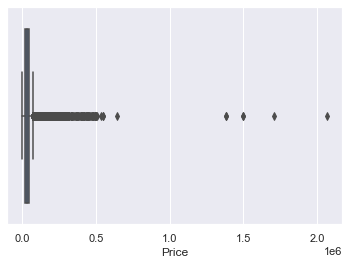

In [15]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HorsePower'>

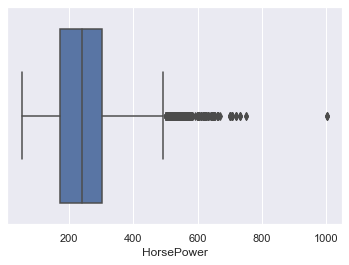

In [16]:
sns.boxplot(x=df['HorsePower'])

<AxesSubplot:xlabel='Cylinders'>

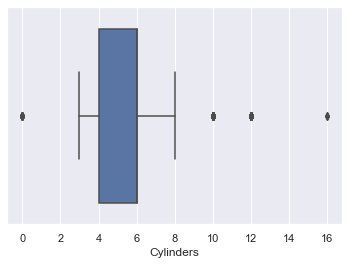

In [17]:
sns.boxplot(x=df['Cylinders'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HorsePower      130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Price         21327.5
dtype: float64


Não se preocupe com os valores acima porque não é importante conhecer cada um deles, pois é importante apenas saber como usar esta técnica para remover os outliers.

In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/tmp/ipykernel_59349/4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

Como visto acima, havia cerca de 1600 linhas atípicas. Mas você não pode remover completamente as outliers porque mesmo depois de usar a técnica acima, talvez 1-2 outliers não tenham sido removidos, mas isso está bem porque havia mais de 100 outliers. Algo é melhor do que nada.

### 9. Traçar diferentes características umas contra as outras (dispersão), contra a freqüência (histograma)

**Histograma**

Um Histograma se refere à freqüência de ocorrência de variáveis em um intervalo. Neste caso, existem principalmente 10 tipos diferentes de empresas fabricantes de automóveis, mas muitas vezes é importante saber quem tem o maior número de carros. Fazer este histograma é uma das soluções triviais que nos permite saber o número total de carros fabricados por uma empresa diferente.

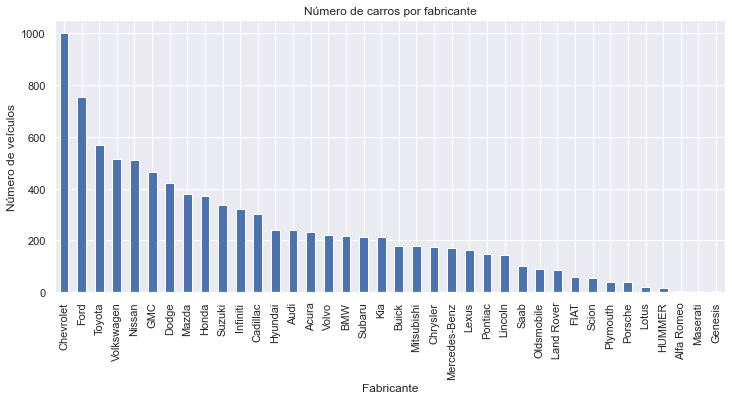

In [20]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(12,5))
plt.title("Número de carros por fabricante")
plt.ylabel('Número de veículos')
plt.xlabel('Fabricante');

**Heat Maps**

O Heat Map é um tipo de gráfico que é necessário quando precisamos encontrar as variáveis dependentes. Uma das melhores maneiras de encontrar a relação entre as características pode ser feita usando os heat maps. No heat map abaixo sabemos que a característica de preço depende principalmente do tamanho do motor, da potência do cavalo e dos cilindros.

,Year,HorsePower,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HorsePower,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


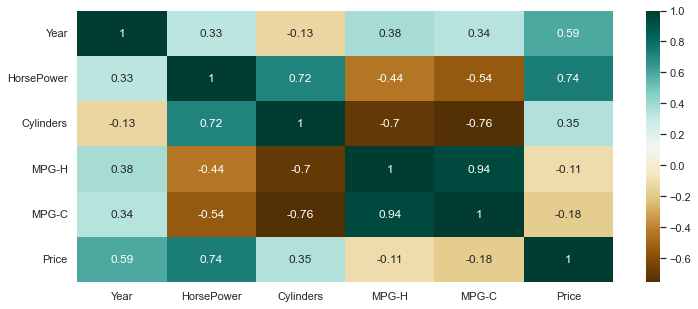

In [21]:
plt.figure(figsize=(12,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**Scatterplot**

Geralmente usamos parcelas de dispersão para encontrar a correlação entre duas variáveis. Aqui as parcelas de dispersão são plotadas entre Horsepower e Price e podemos ver a parcela abaixo. Com o gráfico apresentado abaixo, podemos facilmente traçar uma linha de tendência. Estas características proporcionam uma boa dispersão de pontos.

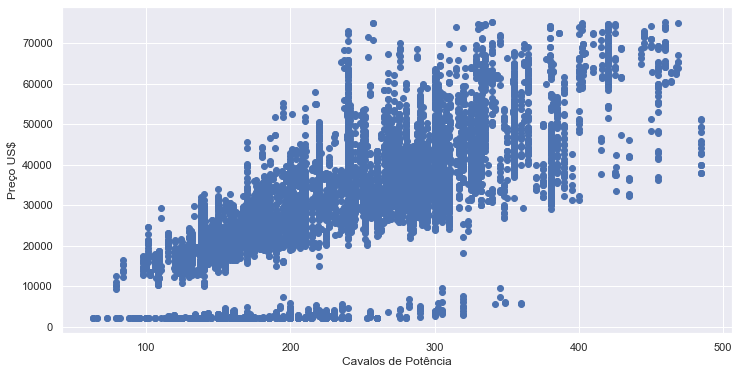

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['HorsePower'], df['Price'])
ax.set_xlabel('Cavalos de Potência')
ax.set_ylabel('Preço US$')
plt.show()

Portanto, os passos acima são alguns dos envolvidos na análise de dados exploratórios, estes são alguns passos gerais que você deve seguir a fim de realizar EDA. Há muito mais ainda por vir, mas por enquanto, esta é uma idéia mais do que suficiente sobre como realizar um bom EDA dado qualquer conjunto de dados.